# Imports

In [46]:
print('Loading libraries')
start_time <- Sys.time()
suppressPackageStartupMessages({
    library(data.table)
    library(ggplot2)
    library(ggpubr)
    library(dplyr)
    library(stringr)
    library(rstatix)
    library(tidyr)
    library(phenoptr)
    }
)
print('Library load finished')
print(Sys.time()-start_time)


hpc =  TRUE
work_desktop = FALSE
work_linux = TRUE
singularity = TRUE
prj =  "HCC-CBS-173-Hillman-BFerris-NRG-HN003-Vectra"
if (!hpc){
    if (work_desktop){
        if (work_linux){
            base = paste0('/mnt/d/OneDrive - University of Pittsburgh/Internal_Project_Data_2/' ,prj)
        }else{
            base =paste0('D:\\OneDrive - University of Pittsburgh\\Internal_Project_Data_2\\', prj)
        }
    }else{
        base = paste0('/home/brian/data/odrive/Internal_Project_Data_2/',prj)
    }
}else{
    if (singularity){
        base = '/mnt'
    }else{
        base = paste0('/ix/rbao/Projects/', prj)
    }
}
print(base)
inform.data <- file.path(base,'data','inform_data_exports')
results <- file.path(base,'results')
print(results)
fn <- 'cell_density_34_all_inc_tumor_stroma_20_percent_v1.csv'
df <- read.csv(file.path(results,fn))
head(df)


[1] "Loading libraries"
[1] "Library load finished"
Time difference of 1.040866 secs
[1] "/mnt"
[1] "/mnt/results"


,Sample.Name,study_id,total_roi,n_tumor_segments,n_stroma_segments,PDL1.panCK.tumor_percent,PDL1.panCK.stroma_percent,PDL1.panCK.all_percent,PDL1.panCKneg.CD3pos.tumor_percent,PDL1.panCKneg.CD3pos.stroma_percent,PDL1.panCKneg.CD3pos.all_percent,PDL1.panCKneg.CD3neg.tumor_percent,PDL1.panCKneg.CD3neg.stroma_percent,PDL1.panCKneg.CD3neg.all_percent,CD3.CD8.Tcell.tumor_percent,CD3.CD8.Tcell.stroma_percent,CD3.CD8.Tcell.all_percent,Treg.tumor_percent,Treg.stroma_percent,Treg.all_percent
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RACTIH_Scan1.qptiff,RACTIH,12,12,12,1.581028,2.4818933,1.932385,0.002949678,0.01845274,0.008996204,0.4277034,2.1220649,1.0885406,0.020647749,0.009226369,0.01619317,0.000000000,0.004613184,0.001799241
2,RACTKE_Scan1.qptiff,RACTKE,285,285,285,68.519584,35.4576429,51.416619,0.049980291,1.07511932,0.580285409,1.1840614,12.9683078,7.2800601,0.055449832,2.010679038,1.06689123,0.092793596,3.922979994,2.074151626
3,RACTLH_Scan2.qptiff,RACTLH,59,59,59,8.792360,3.9117319,6.129775,0.000000000,0.02801540,0.015283563,0.3746256,2.2418837,1.3932923,0.003128397,0.319896799,0.17593870,0.004692596,0.138773968,0.077839544
4,RACTNY_Scan1.qptiff,RACTNY,27,27,27,3.737032,0.8999784,2.049500,0.004234597,0.02019182,0.013726247,0.3917002,0.7427706,0.6005233,0.406521279,1.400447105,0.99772659,0.175735761,0.346145525,0.277098615
5,RACTRF_Scan1.qptiff,RACTRF,10,10,10,13.805149,1.4236082,8.444917,0.058222280,0.14405559,0.095381342,0.2393583,0.7880688,0.4769067,0.226419977,1.559189899,0.80340438,2.083063786,5.363952207,3.503430060
6,RACTRU_Scan1.qptiff,RACTRU,38,38,38,23.019207,8.3016812,11.614162,0.036987134,0.47420639,0.375801253,1.4504240,7.0893089,5.8201625,2.079205305,1.963582790,1.98960600,0.198145359,1.952840251,1.557910260


In [32]:
fns = list.files(inform.data,pattern = '*cell_seg_data.txt')
length(fns)
print(fns[100])

[1] 2029

[1] "RACTKE_Scan1_[12997,52179]_cell_seg_data.txt"


# Load example inForm cell_seg output .txt file:

Note: confirmed there are tumor and stroma regions in this file

In [2]:
csd <- read.csv(file.path(inform.data,'RACTIH_Scan1_[16434,44304]_cell_seg_data.txt'),
               sep = '\t',
               check.names=FALSE) #check.names=FALSE will prevent replacing spaces with periods
head(csd,n=2)

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,⋯,TMA Row,TMA Column,TMA Field,Confidence-CD3,Confidence-PDL1,Confidence-CK,Confidence-CD8,Confidence-PD1,Confidence-FOXP3,inForm 2.6.7900.18857
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,other,other,other,other,other,other,1,⋯,0,0,0,99.72%,100.00%,99.98%,99.80%,99.67%,100.00%,NA
2,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,PD1+,other,2,⋯,0,0,0,99.73%,99.97%,100.00%,96.40%,93.45%,99.97%,NA


# Reformat the cell_seg to contain new unified Phenotype column

In [3]:
unique(csd[,'Tissue Category'])

[1] "Tumor"  "Stroma" "Blank"

In [8]:
p <- c('Phenotype-CK','Phenotype-PDL1','Phenotype-CD3',
       'Phenotype-CD8','Phenotype-PD1','Phenotype-FOXP3')
csd$combined.pheno <- ''
for (pheno in p){
    temp = csd[,pheno]
    temp[temp=='other'] = ''
    csd$combined.pheno <- paste0(csd$combined.pheno,temp)
    }
dim(csd)
# Remove cells with no labeling:

clean.csd <- csd[csd[,'Tissue Category'] != 'Blank',]
clean.csd$combined.pheno[clean.csd$combined.pheno == ''] = 'other'
# clean.csd <- clean.csd %>% filter(combined.pheno != '')
dim(clean.csd)

# Remove CK+ cell labeling false alarms:
idx.1 <- clean.csd$combined.pheno %like% 'CK+'
print(sum(idx.1))
idx.2 <- !(clean.csd$combined.pheno %in% c('CK+','CK+PDL1+','CK+PD1+'))
idx <- idx.1 & idx.2
clean.csd[idx,'combined.pheno'] <- substring(clean.csd[idx,'combined.pheno'],
                                          first=4,last=nchar(clean.csd$combined.pheno[idx]))

# Count
clean.csd %>% count(combined.pheno)
# clean.csd %>% count('Tissue Category')

[1] 5418  219

[1] 5416  219

[1] 2308


combined.pheno,n
<chr>,<int>
CD3+,4
CD3+CD8+PD1+,1
CD3+PD1+,3
CD8+,35
CD8+PD1+,8
CK+,1234
CK+PD1+,1047
CK+PDL1+,4
FOXP3+,3


# Distance matrix approach

In [19]:
?subset_distance_matrix

subset_distance_matrix {phenoptr},R Documentation
csd,"A data frame containing cell segmentation data, such as the result of read_cell_seg_data."
dst,"The distance matrix corresponding to csd, produced by calling distance_matrix."
"row_selection, col_selection",Selection criteria for the rows and columns. Accepts all formats accepted by select_rows.


In [5]:
dst <- distance_matrix(clean.csd) # Compute this just once and re-use it
dim(dst)

[1] 5416 5416

In [44]:
sub <- clean.csd[tissue,]
tissue <- clean.csd[,'Tissue Category'] == 'Tumor'
dst <- distance_matrix(sub) # Compute this just once and re-use it
close <- (dst >= 1) & (dst < 35)
ck <- sub$combined.pheno %in% c('CK+')
sum(ck)
cd3 <- sub$combined.pheno == 'CD3+'

sd.0 <- dst[ck,cd3]
dim(sd.0)


idx <- (sd.0 > 0) & (sd.0 <= 35)
numerator = sum(colSums(idx) > 0)
sd.1 <- dst[ck,]
close.1 <- (sd.1 > 0) & (sd.1 <= 35)
denom <- sum(colSums(close.1) >= 1)
numerator/denom * 100

[1] 160

[1] 160   2

[1] 0.05482456

In [58]:
clean.csd$tissue <- clean.csd[,'Tissue Category']
unique(clean.csd$tissue)

[1] "Stroma" "Tumor"

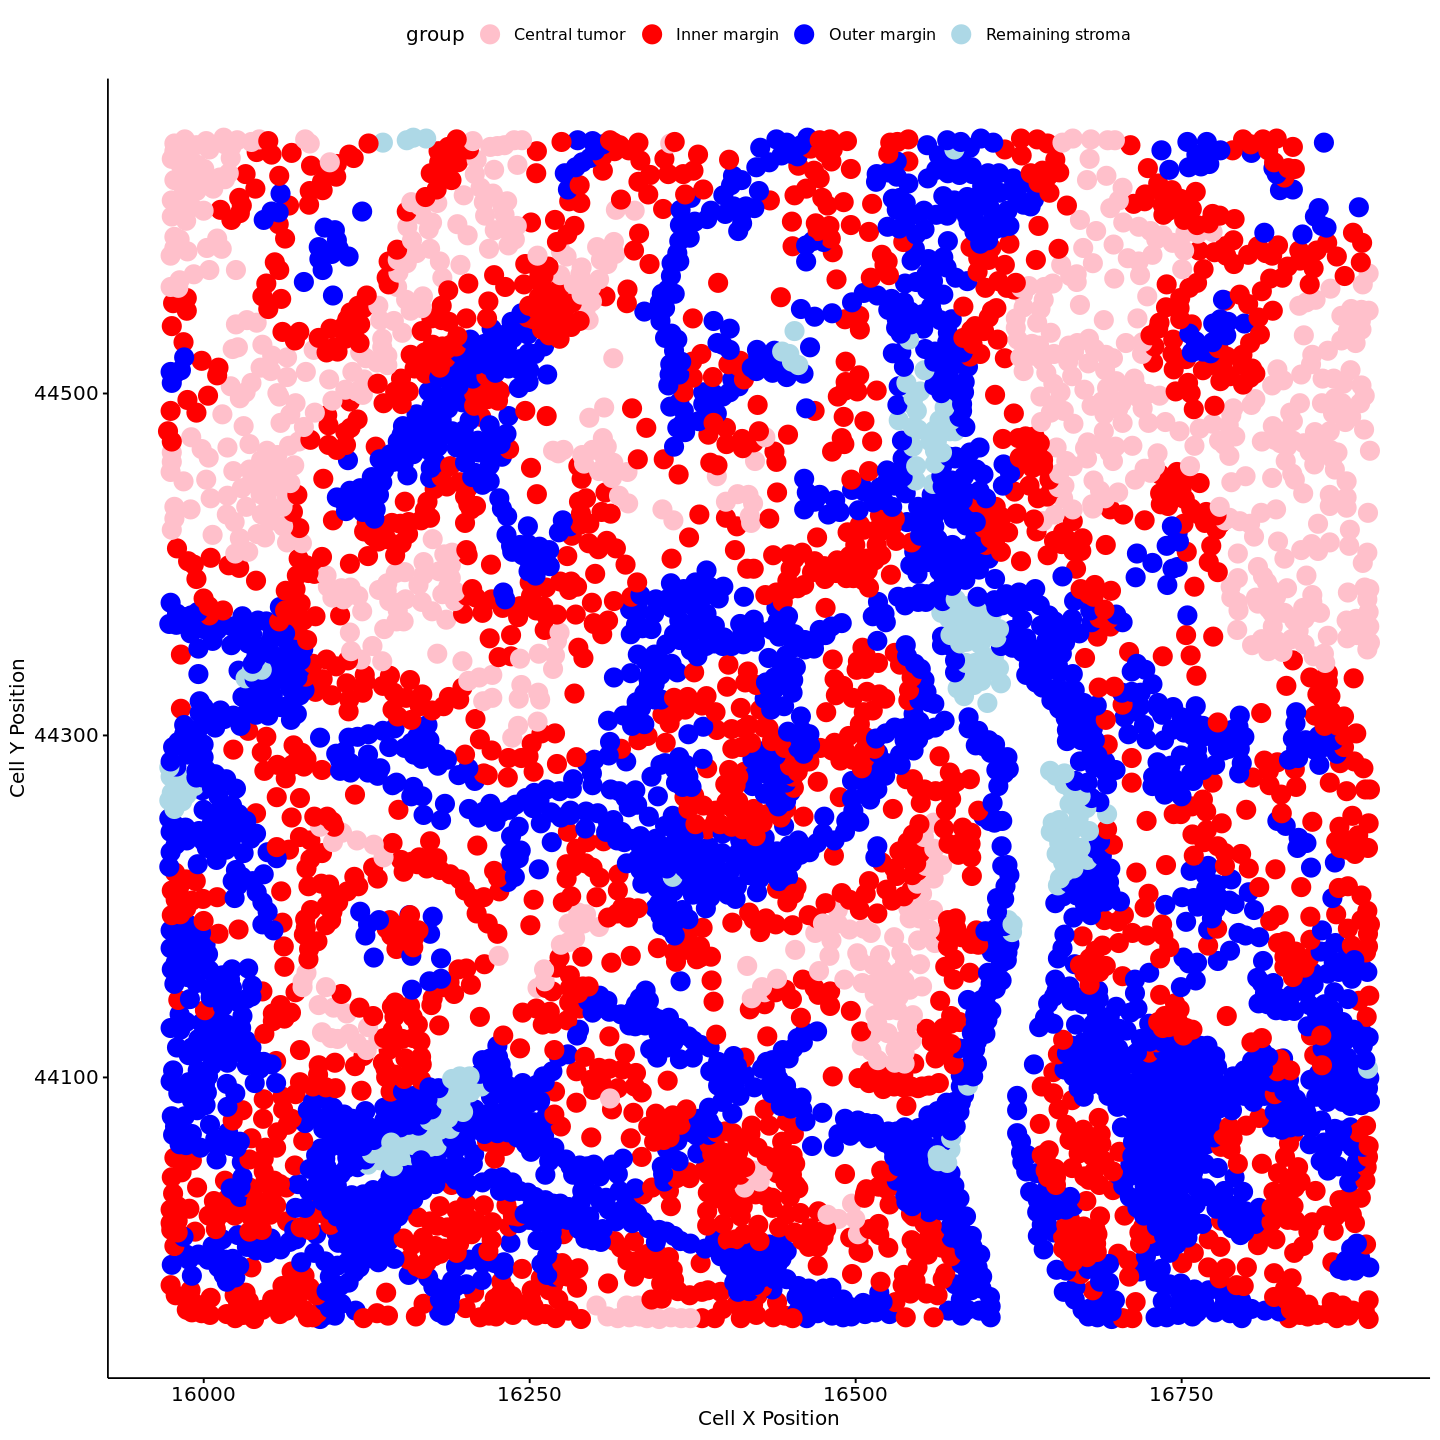

In [89]:
options(repr.plot.height=12,repr.plot.width = 12)
sub <- clean.csd
dst <- distance_matrix(sub) # Compute this just once and re-use it
sub$group <- 'Other'

ck <- sub$combined.pheno %in% c('CK+')
sd.1 <- dst[ck,]
close.1 <- (sd.1 > 0) & (sd.1 <= 35)
outer.margin <- (colSums(close.1) >= 1) & (sub$tissue == 'Stroma')

sd.2 <- dst[sub$tissue == 'Stroma',]
close.2 <- (sd.2 > 0) & (sd.2 <= 35)
inner.margin <- (colSums(close.2) >= 1) & (sub$tissue == 'Tumor')

sub$group[sub$tissue == 'Tumor'] <- "Central tumor"
sub$group[inner.margin] <- 'Inner margin'
sub$group[sub$tissue == 'Stroma'] <- 'Remaining stroma'
sub$group[outer.margin] <- 'Outer margin'
ggscatter(sub,
         x ='Cell X Position',
         y = 'Cell Y Position',
         color = 'group',
         size = 5,
         palette = c('pink','red','blue','lightblue')
         ) 


In [47]:
?distance_matrix

distance_matrix {phenoptr},R Documentation
csd,"A data frame with Cell X Position and Cell Y Position columns, such as the result of read_cell_seg_data."


In [26]:
clean.csd[cd3,1:10]
clean.csd[select_rows(clean.csd,'CD3+'),1:10]

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1122,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,CD3+,other,other,other,other,other,1122
1347,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,CD3+,other,other,other,other,other,1347
1942,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,CD3+,other,CK+,other,other,other,1942
2479,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,CD3+,other,CK+,other,other,other,2479


,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1122,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,CD3+,other,other,other,other,other,1122
1347,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,CD3+,other,other,other,other,other,1347


In [23]:
sd.0[1:5,]
sd[1:5,]

,1122,1347,1942,2479
7,571.3752,135.6204,214.1270,789.6721
10,483.4317,144.7177,201.1526,706.7125
13,444.9088,165.3608,208.3803,670.8118
15,429.3823,176.7876,214.6806,656.6753
16,419.6974,172.7462,205.9426,645.1690


,1122,1347
7,571.3752,135.6204
10,483.4317,144.7177
13,444.9088,165.3608
15,429.3823,176.7876
16,419.6974,172.7462


In [9]:
unique(clean.csd$combined.pheno)

[1] "other"         "CK+PD1+"       "CK+"           "PD1+"         
 [5] "PDL1+"         "CK+PDL1+"      "CD8+"          "CD8+PD1+"     
 [9] "PDL1+PD1+"     "PD1+FOXP3+"    "CD3+PD1+"      "PDL1+CD8+PD1+"
[13] "CD3+CD8+PD1+"  "CD3+"          "FOXP3+"

In [10]:
unique(clean.csd$combined.pheno[select_rows(clean.csd,'CK+')])

[1] "CK+"

In [22]:
idx.dst <- (dst < 35)
sqrt(sum(idx.dst))


[1] 219.9295

In [25]:
?select_rows

select_rows {phenoptr},R Documentation
csd,A data frame
sel,"May be a character vector, a one-sided formula, a list containing such or NA. A character vector is interpreted as the name(s) of one or more phenotypes and selects any matching phenotype. A formula is interpreted as an expression on the columns of csd. Multiple list items are joined with AND. NA is interpreted as ""select all"". It is convenient for lists of selection criteria."


In [42]:
selector <- list('CK+', ~`Entire Cell PD-L1 (Opal 520) Total (Normalized Counts, Total Weighting)`>25)
pdl1.test <- select_rows(clean.csd, selector)
sum(pdl1.test)
clean.csd[pdl1.test,1:20]

[1] 1094

,Path,Sample Name,Tissue Category,Phenotype-CD3,Phenotype-PDL1,Phenotype-CK,Phenotype-CD8,Phenotype-PD1,Phenotype-FOXP3,Cell ID,Total Cells,Tissue Category Area (square microns),Cell Density (per square mm),Cell X Position,Cell Y Position,Process Region ID,Distance from Process Region Edge (microns),Category Region ID,Distance from Tissue Category Edge (microns),Nucleus Area (square microns)
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
5,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,7,NA,NA,NA,15987.0,43964.1,#N/A,#N/A,1,#N/A,61.6
7,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,10,NA,NA,NA,16076.8,43964.1,#N/A,#N/A,#N/A,#N/A,164.1
8,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Stroma,other,other,CK+,other,other,other,13,NA,NA,NA,16116.5,43963.6,#N/A,#N/A,#N/A,2.5,126.2
9,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,15,NA,NA,NA,16132.9,43962.1,#N/A,#N/A,2,#N/A,105.0
10,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,16,NA,NA,NA,16139.9,43974.1,#N/A,#N/A,#N/A,4.1,1017.4
11,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,17,NA,NA,NA,16162.7,43960.2,#N/A,#N/A,2,#N/A,30.3
13,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,19,NA,NA,NA,16200.9,43965.1,#N/A,#N/A,#N/A,2.0,248.6
15,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,22,NA,NA,NA,16262.0,43961.6,#N/A,#N/A,3,#N/A,62.8
16,D:\Data\VectraPolaris\NRG-HN003\RACTIH\Scan1,RACTIH_Scan1.qptiff,Tumor,other,other,CK+,other,other,other,26,NA,NA,NA,16309.6,43960.2,#N/A,#N/A,3,#N/A,47.3


In [44]:
# Try count_within() measure CD3+FOXP3+ to CK+

In [12]:
# Find the number of Tregs with a tumor cell 35 microns
for (pheno in unique(clean.csd$Phenotype)){
    print(pheno)
    outer_margin <- count_within(clean.csd, 
                                 from=pheno, 
                                 to='CK+', 
                                 radius=c(35),
                                 category = c('Stroma')
                                 )
    idx = outer_margin$from_with > 0
    print(outer_margin[idx,])
}
# outer_margin

[1] "CK+PD1+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35         13      160        11        1.54
[1] "CK+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35        160      160       124        1.62
[1] "PD1+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35         57      160        42        1.18
[1] "PDL1+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35         35      160        26        1.43
[1] "CK+PDL1+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35          1      160         1           2
[1] "CD8+"
# A tibble: 1 × 5
  radius from_count to_count from_with within_mean
   

In [5]:
pheno <- 'PD1+'
outer_margin <- count_within(clean.csd, from=pheno, to='CK+', 
                         radius=c(35,50,100,200),  category = c('Tumor'))
idx = outer_margin$from_with > 0
print(outer_margin[idx,])

# A tibble: 4 × 5
  radius from_count to_count from_with within_mean
   <dbl>      <int>    <int>     <int>       <dbl>
1     35         38     1074        38        6.71
2     50         38     1074        38       12.4 
3    100         38     1074        38       38.2 
4    200         38     1074        38      134.  


Workflow idea: is it possible to subset any cell with < 30um distance to tumor?

ultimately how do I determine N cells within 35um of tumor outer margin / inner margin? create version where tissue category is set as the phenotype? trying this:

In [80]:
temp <- clean.csd
temp$Phenotype <- temp[,'Tissue Category']

distances <- find_nearest_distance(temp)
temp <- bind_cols(temp, distances)
temp %>% group_by(Phenotype) %>% 
  select(Phenotype, starts_with('Distance to')) %>% 
  summarize_all(~round(mean(.), 1))
dist = 100
outer_margin <- (temp[,'Distance to Tumor'] < dist) && (temp[,'Tissue Category'] =='Stroma')
inner_margin <- (temp[,'Distance to Stroma'] < dist ) && (temp[,'Tissue Category'] =='Tumor')
print(sum(outer_margin))
print(sum(inner_margin))
# outer_margin <- count_within(temp, from='Stroma', to='Tumor', 
#                              radius=c(35))
# outer_margin

Phenotype,Distance to Blank,Distance to Stroma,Distance to Tumor
<chr>,<dbl>,<dbl>,<dbl>
Blank,NA,14.4,56.2
Stroma,347.9,12.1,24.2
Tumor,351.1,34.8,8.7


[1] 0
[1] 1


In [79]:
sum(temp[,'Tissue Category'] =='Stroma')

[1] 585

In [78]:
sum(temp[,'Distance to Tumor'] < 35 )

[1] 2791

# Loop through files and measure how many cells in the margins

In [97]:

dim(df)
head(df)

[1] 2029    2

,inner_n,outer_n
,<lgl>,<lgl>
"RACTIH_Scan1_[15509,42225]_cell_seg_data.txt",NA,NA
"RACTIH_Scan1_[15509,42918]_cell_seg_data.txt",NA,NA
"RACTIH_Scan1_[15509,43611]_cell_seg_data.txt",NA,NA
"RACTIH_Scan1_[15509,44304]_cell_seg_data.txt",NA,NA
"RACTIH_Scan1_[16434,42225]_cell_seg_data.txt",NA,NA
"RACTIH_Scan1_[16434,42918]_cell_seg_data.txt",NA,NA


In [99]:
p <- c('Phenotype-CK','Phenotype-PDL1','Phenotype-CD3',
   'Phenotype-CD8','Phenotype-PD1','Phenotype-FOXP3')
df <- data.frame(matrix(NA, nrow = length(fns), ncol = 2),row.names=fns)
colnames(df) <- c('inner_n','outer_n')
for (fn in fns){
    csd <- read.csv(file.path(inform.data,fn),
               sep = '\t',
               check.names=FALSE) #check.names=FALSE will prevent replacing spaces with periods\
    csd$Phenotype <- ''
    for (pheno in p){
        temp = csd[,pheno]
        temp[temp=='other'] = ''
        csd$Phenotype <- paste0(csd$Phenotype,temp)
        }
    # dim(csd)
    # Remove cells with no labeling:

    clean.csd <- csd[clean.csd[,'Tissue Category'] != 'Blank',]
    clean.csd <- clean.csd %>% filter(Phenotype != '')
    # dim(clean.csd)

    # Remove CK+ cell labeling false alarms (CK+CD3+CD8+ etc):
    idx.1 <- clean.csd$Phenotype %like% 'CK+'
    # print(sum(idx.1))
    idx.2 <- !(clean.csd$Phenotype %in% c('CK+','CK+PDL1+','CK+PD1+'))
    idx <- idx.1 & idx.2
    clean.csd[idx,'Phenotype'] <- substring(clean.csd[idx,'Phenotype'],
                                              first=4,last=nchar(clean.csd$Phenotype[idx]))
    
    temp <- clean.csd
    temp$Phenotype <- temp[,'Tissue Category']

    distances <- find_nearest_distance(temp)
    temp <- bind_cols(temp, distances)
    temp %>% group_by(Phenotype) %>% 
      select(Phenotype, starts_with('Distance to')) %>% 
      summarize_all(~round(mean(.), 1))
    dist = 100
    outer_margin <- (temp[,'Distance to Tumor'] < dist) && (temp[,'Tissue Category'] =='Stroma')
    inner_margin <- (temp[,'Distance to Stroma'] < dist ) && (temp[,'Tissue Category'] =='Tumor')
    df[fn,'inner_n'] <- sum(inner_margin)
    df[fn,'outer_n'] <- sum(outer_margin)
    }

ERROR: Error in `[.data.frame`(temp, , "Distance to Stroma"): undefined columns selected


In [ ]:
mean(df)

In [ ]:
help(mean)